In [1]:
import pandas as pd
import os
import csv
import numpy as np
from datetime import datetime
import datetime
import calendar
import matplotlib
import plotnine as p9
from plotnine import ggplot, geom_bar, ggtitle, themes
from scipy.stats import zscore

In [2]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
df = pd.read_csv('Final_PowerPlantData.csv')
dfs = pd.read_csv('clean_so2.csv')

In [4]:
df.columns

Index(['Date', 'GEO', 'NG', 'NUC', 'OBG', 'OT', 'SUN', 'WAT', 'WND', 'Total'], dtype='object')

In [5]:
df = df.rename(columns={'Date':'Month'})
df = df.merge(dfs, on='Month', how='left')
og = df

In [6]:
dat = np.repeat(20, 72, axis=0).astype(str)  + df["Month"].astype(str) 
dat = pd.to_datetime(dat)
end = dat + pd.offsets.MonthBegin(1) - datetime.timedelta(days = 1)
df["Month"] = end
df = df.melt(id_vars='Month')

In [7]:
df = df.rename(columns={'variable':'Source'})

In [8]:
noso = df[(df["Source"] != "SO2_AQI") & (df["Source"] != "SO2_Con") & (df["Source"] != "Total")]

In [9]:
noso

,Month,Source,value
0,2015-01-31,GEO,1043735.01
1,2015-02-28,GEO,950206.01
2,2015-03-31,GEO,965262.02
3,2015-04-30,GEO,964087.03
4,2015-05-31,GEO,1056928.05
...,...,...,...
571,2020-08-31,WND,1410098.99
572,2020-09-30,WND,864390.00
573,2020-10-31,WND,827252.63
574,2020-11-30,WND,649114.27


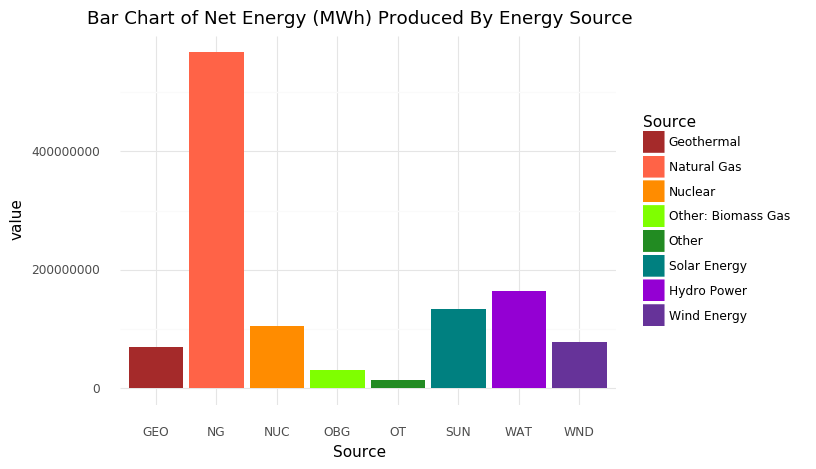

<ggplot: (-9223372036534404159)>

In [251]:
(
    ggplot(data=noso, mapping= aes(x="Source", y="value", fill = "Source")) 
    + geom_bar(stat="identity") 
    + ggtitle("Bar Chart of Net Energy (MWh) Produced By Energy Source") 
    + scale_fill_manual(values = ["brown", "tomato", "darkorange", "chartreuse", "forestgreen", "teal", "darkviolet", "rebeccapurple"], name = "Source", labels = ["Geothermal", "Natural Gas", "Nuclear","Other: Biomass Gas", "Other", "Solar Energy", "Hydro Power", "Wind Energy"])
    + theme_minimal()
    
)

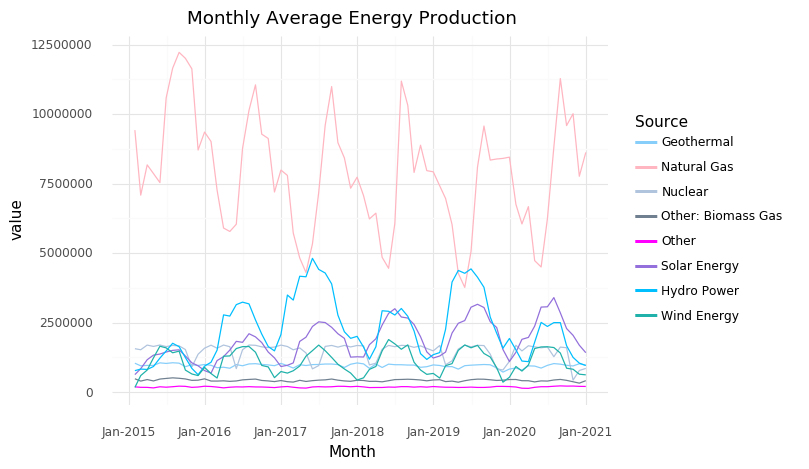

<ggplot: (319161387)>

In [252]:
(
    ggplot(data=noso, mapping= aes(x="Month", y="value", color = "Source")) 
    + geom_line(stat = "identity") 
    + ggtitle("Monthly Average Energy Production") 
    + scale_color_manual(values = ["lightskyblue", "lightpink", "lightsteelblue", "slategray", "magenta", "mediumpurple", "deepskyblue", "lightseagreen"], name = "Source", labels = ["Geothermal", "Natural Gas", "Nuclear","Other: Biomass Gas", "Other", "Solar Energy", "Hydro Power", "Wind Energy"])
    + scale_x_datetime(date_breaks = "1 year",date_labels = "%b-%Y")
    + theme_minimal()
    
)

In [257]:
nm = og.loc[:, og.columns != 'Month']
ze = zscore(nm)
ze['Month'] = np.repeat(0, 72, axis=0).astype(str)
ze['Month'] = end
tee = ze.melt(id_vars='Month')

In [267]:
tee = tee.rename(columns={'variable':'Source'})

In [287]:
ngso = tee[(tee["Source"] == "SO2_Con") | (tee["Source"] == "NG")]
hydso = tee[(tee["Source"] == "SO2_Con") | (tee["Source"] == "WAT")]
wndso = tee[(tee["Source"] == "SO2_Con") | (tee["Source"] == "WND")]
solso = tee[(tee["Source"] == "SO2_Con") | (tee["Source"] == "SUN")]

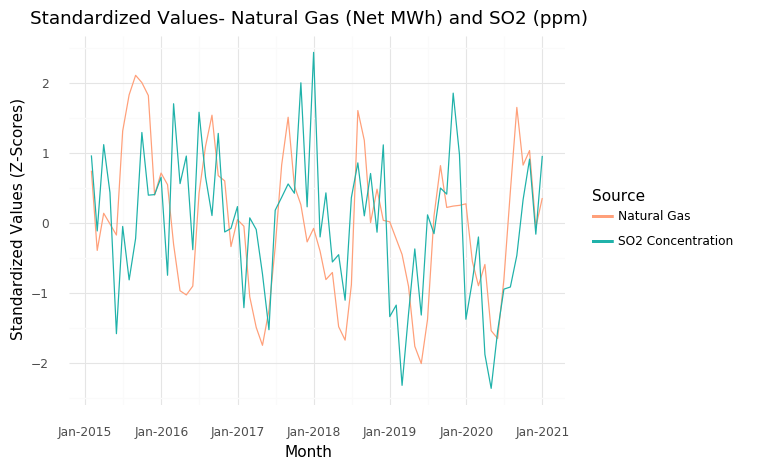

<ggplot: (318689898)>

In [276]:
(
    ggplot(data=ngso, mapping= aes(x="Month", y="value", color = "Source")) 
    + geom_line(stat = "identity") 
    + labs(title ="Standardized Values- Natural Gas (Net MWh) and SO2 (ppm)", y = "Standardized Values (Z-Scores)") 
    + scale_color_manual(values = ["lightsalmon","lightseagreen"], name = "Source", labels = ["Natural Gas", "SO2 Concentration"])
    + scale_x_datetime(date_breaks = "1 year",date_labels = "%b-%Y")
    + theme_minimal()
    
)

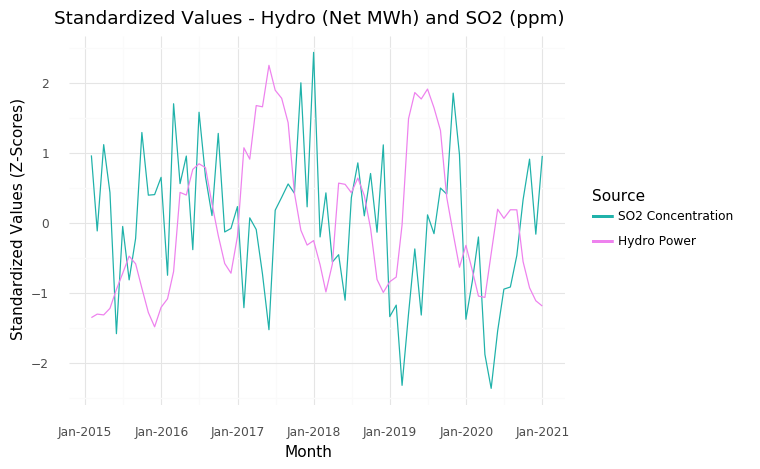

<ggplot: (-9223372036535587808)>

In [296]:
(
    ggplot(data=hydso, mapping= aes(x="Month", y="value", color = "Source")) 
    + geom_line(stat = "identity") 
    + labs(title ="Standardized Values - Hydro (Net MWh) and SO2 (ppm)", y = "Standardized Values (Z-Scores)") 
    + scale_color_manual(values = ["lightseagreen","violet"], name = "Source", labels = ["SO2 Concentration", "Hydro Power"])
    + scale_x_datetime(date_breaks = "1 year",date_labels = "%b-%Y")
    + theme_minimal()
    
)

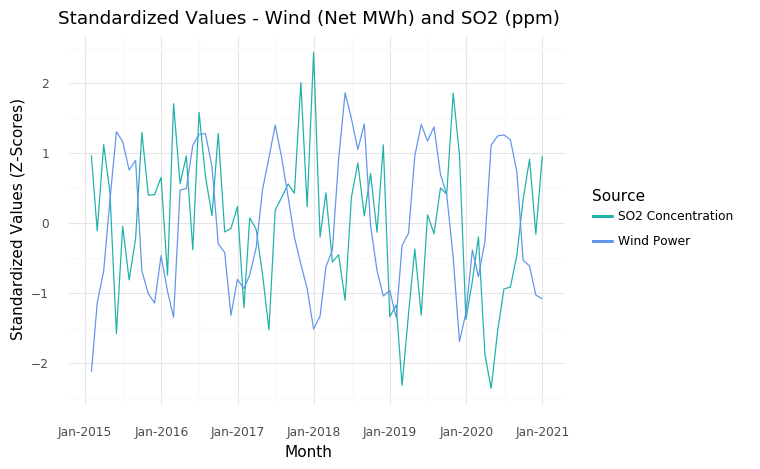

<ggplot: (-9223372036536294733)>

In [301]:
(
    ggplot(data=wndso, mapping= aes(x="Month", y="value", color = "Source")) 
    + geom_line(stat = "identity") 
    + labs(title ="Standardized Values - Wind (Net MWh) and SO2 (ppm)", y = "Standardized Values (Z-Scores)") 
    + scale_color_manual(values = ["lightseagreen","cornflowerblue"], name = "Source", labels = ["SO2 Concentration", "Wind Power"])
    + scale_x_datetime(date_breaks = "1 year",date_labels = "%b-%Y")
    + theme_minimal()
    
)

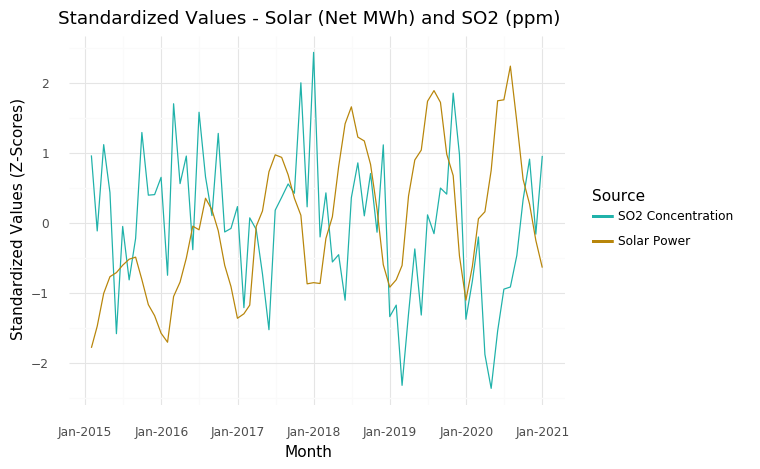

<ggplot: (319760809)>

In [302]:
(
    ggplot(data=solso, mapping= aes(x="Month", y="value", color = "Source")) 
    + geom_line(stat = "identity") 
    + labs(title ="Standardized Values - Solar (Net MWh) and SO2 (ppm)", y = "Standardized Values (Z-Scores)") 
    + scale_color_manual(values = ["lightseagreen","darkgoldenrod"], name = "Source", labels = ["SO2 Concentration", "Solar Power"])
    + scale_x_datetime(date_breaks = "1 year",date_labels = "%b-%Y")
    + theme_minimal()
    
)

In [369]:
datee = df['Month'].dt.year
s = pd.Series(datee, dtype="category")
e = df['Month'].dt.month
e = pd.Series(e, dtype="category")
df['s'] = s
df['e'] = e